# House Prices - Advanced Regression Techniques

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

# House Keeping <a id="house"></a>

## Import Libraries, load dataset and do a short summary

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load datasets
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# mark train and test sets for future split
df_train['train_test'] = 1
df_test['train_test'] = 0
#test['Survived'] = np.NaN

#combine to a single dataframe with all data for feature engineering
df_all = pd.concat([df_train, df_test])

# print dataset shape and columns
trow, tcol = df_train.shape
erow, ecol = df_test.shape
srow, scol = df_sample_submission.shape

print(f'''
Train Dataset:
Loaded train dataset with shape {df_train.shape} ({trow} rows and {tcol} columns)

Test Dataset:
Loaded test dataset with shape {df_test.shape} ({erow} rows and {ecol} columns)

Sample Submission Dataset:
Loaded sample submission dataset with shape {df_sample_submission.shape} ({srow} rows and {scol} columns)
''')


Train Dataset:
Loaded train dataset with shape (1460, 82) (1460 rows and 82 columns)

Test Dataset:
Loaded test dataset with shape (1459, 81) (1459 rows and 81 columns)

Sample Submission Dataset:
Loaded sample submission dataset with shape (1459, 2) (1459 rows and 2 columns)



In [27]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [29]:
df_all.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_test
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


## Initial thoughts

* ALOT of features, most likely some method or feature reduction will be usefull, PCA f.ex.
* The **ID** feature provides no information besides listing the houses, so we will drop it.
* The **PoolQC** feature has 10 values out of 2901 rows, so its unlikely to provide any usefull information to the model, so we will drop it.
* Since we are dropping the **PoolQC** we should also drop the **PoolArea** since these are obviously linked
* Several features with null values
* Both categorical and numerical features

**The Exploratory Data Analysis should help us chose which features to elimimate**

In [30]:
# drop the Id and PoolQC columns
df_all = df_all.drop(['Id', 'PoolQC', 'PoolArea'], axis=1)

# Exploratory Data Analysis

## Categorize columns

In [31]:
# target we are trying to predict (label)
label = 'SalePrice'

# numerical columns with dtypes int and float
num_features = (df_all.select_dtypes(include=['int64', 'float64'])
                      .columns
                      .tolist())

# categorical columns with dtypes NOT int and float
cat_features = (df_all.select_dtypes(exclude=['int64', 'float64'])
                      .columns
                      .tolist())

## Column information

In [32]:
df = pd.DataFrame(data={
    'Number of Missing Values': df_all.isna().sum(),
    'Number of Unique Values': df_all.nunique(),
    'Unique Values': [df_all[col].unique().tolist() for col in df_all.columns],
    'Column type': df_all.dtypes
})

df

,Number of Missing Values,Number of Unique Values,Unique Values,Column type
MSSubClass,0,16,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",int64
MSZoning,4,5,"[RL, RM, C (all), FV, RH, nan]",object
LotFrontage,486,128,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",float64
LotArea,0,1951,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",int64
Street,0,2,"[Pave, Grvl]",object
...,...,...,...,...
YrSold,0,5,"[2008, 2007, 2006, 2009, 2010]",int64
SaleType,1,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",object
SaleCondition,0,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",object
SalePrice,1459,663,"[208500.0, 181500.0, 223500.0, 140000.0, 25000...",float64


## Plot numerical columns

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


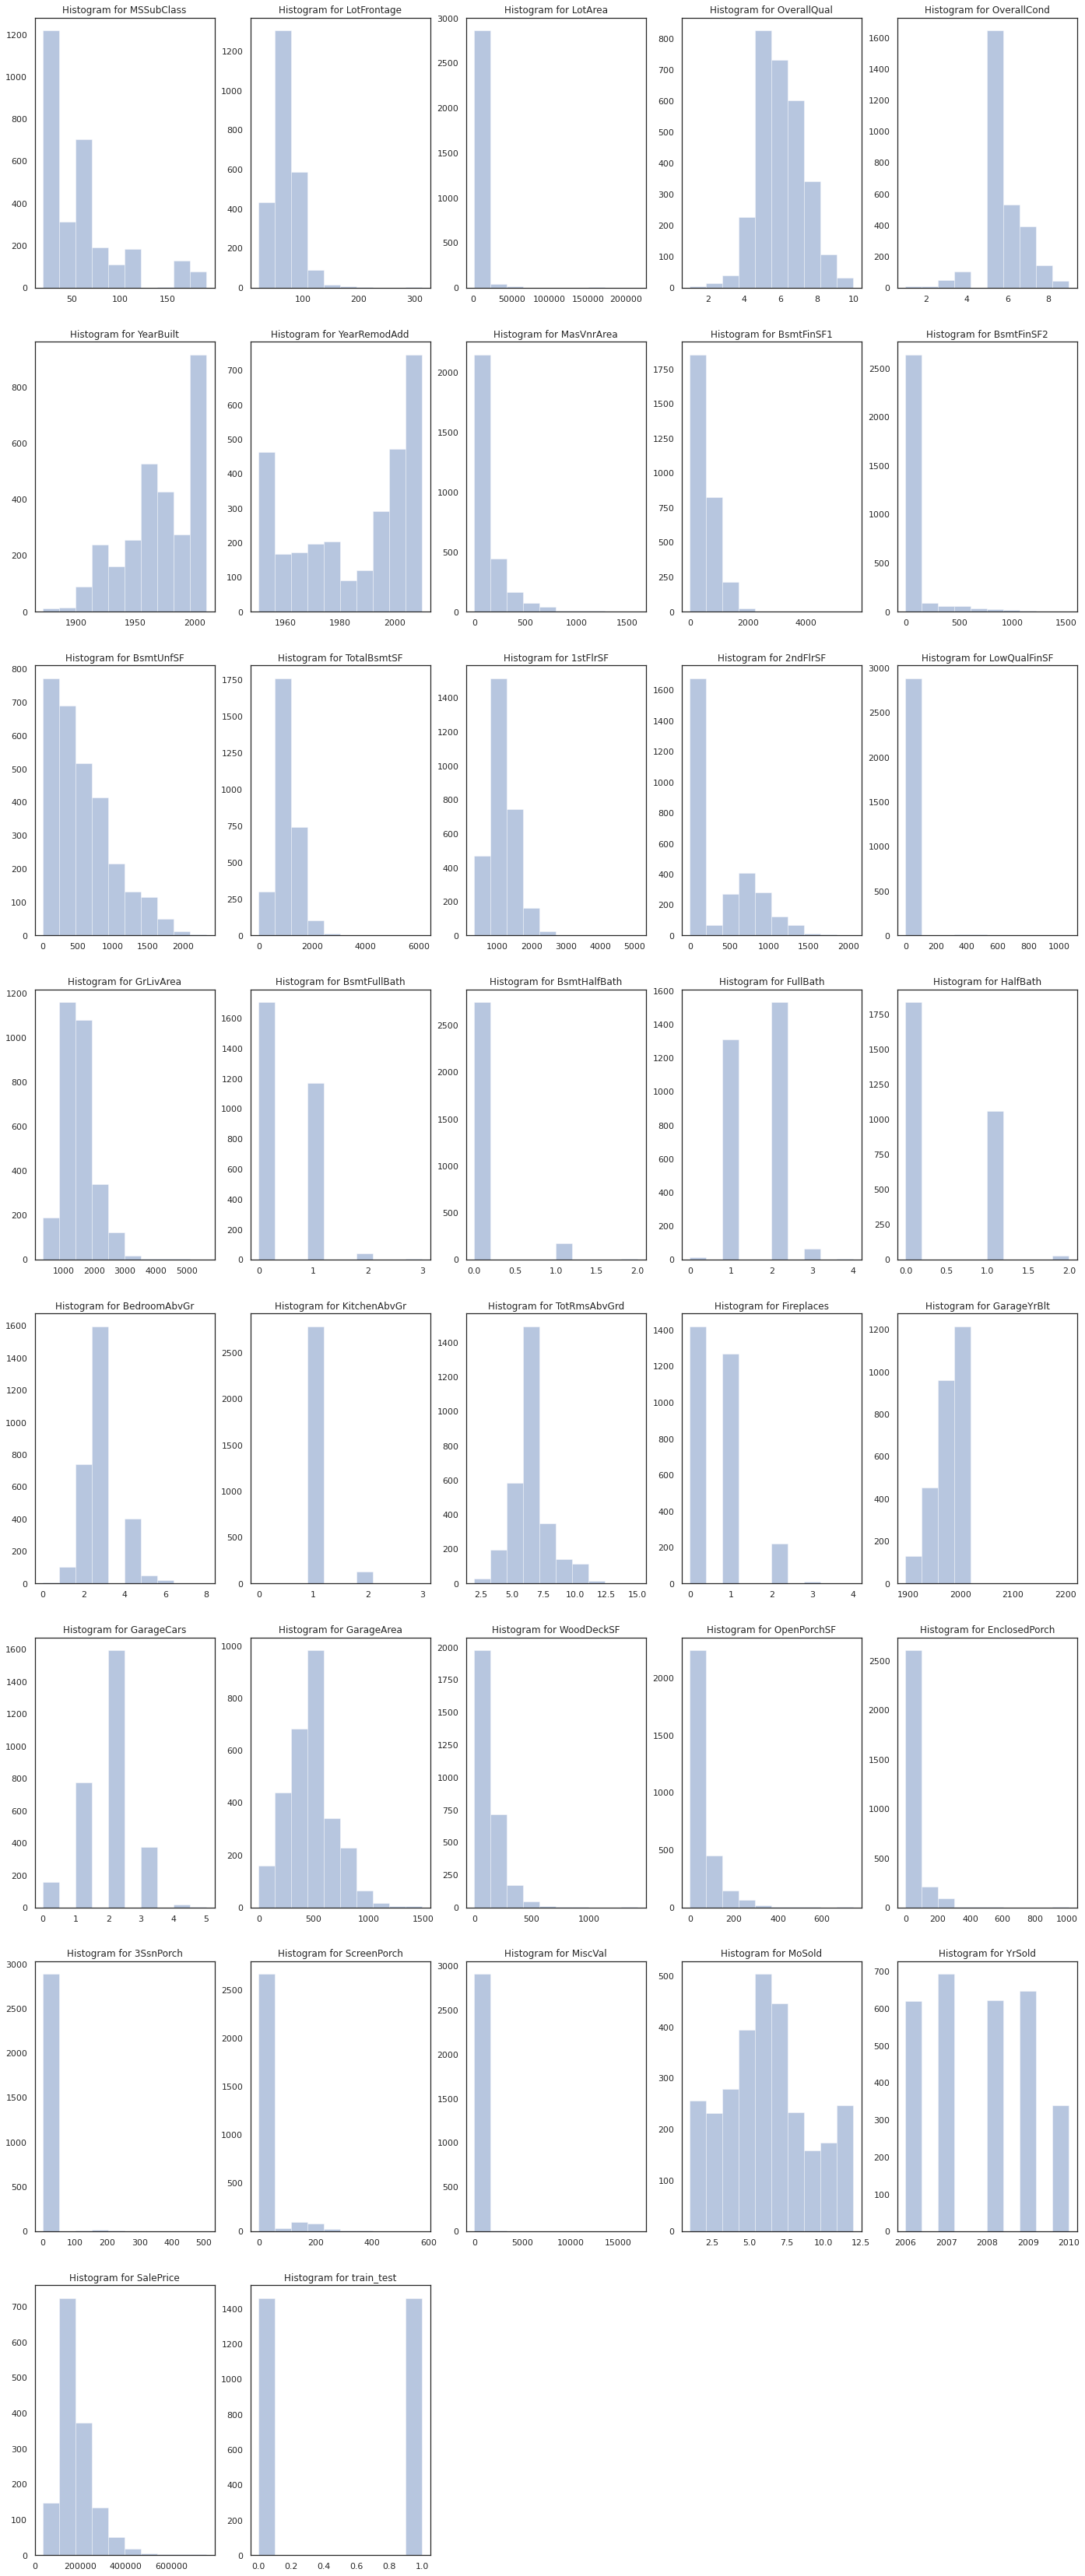

In [33]:
plt.figure(figsize=(24,60))
col_count = 1

for col in num_features[:37]:
    plt.subplot(8,5,col_count)
    sns.distplot(x=df_all[col], kde=False, bins=10)
    plt.title(f'Histogram for {col}')
    
    col_count += 1

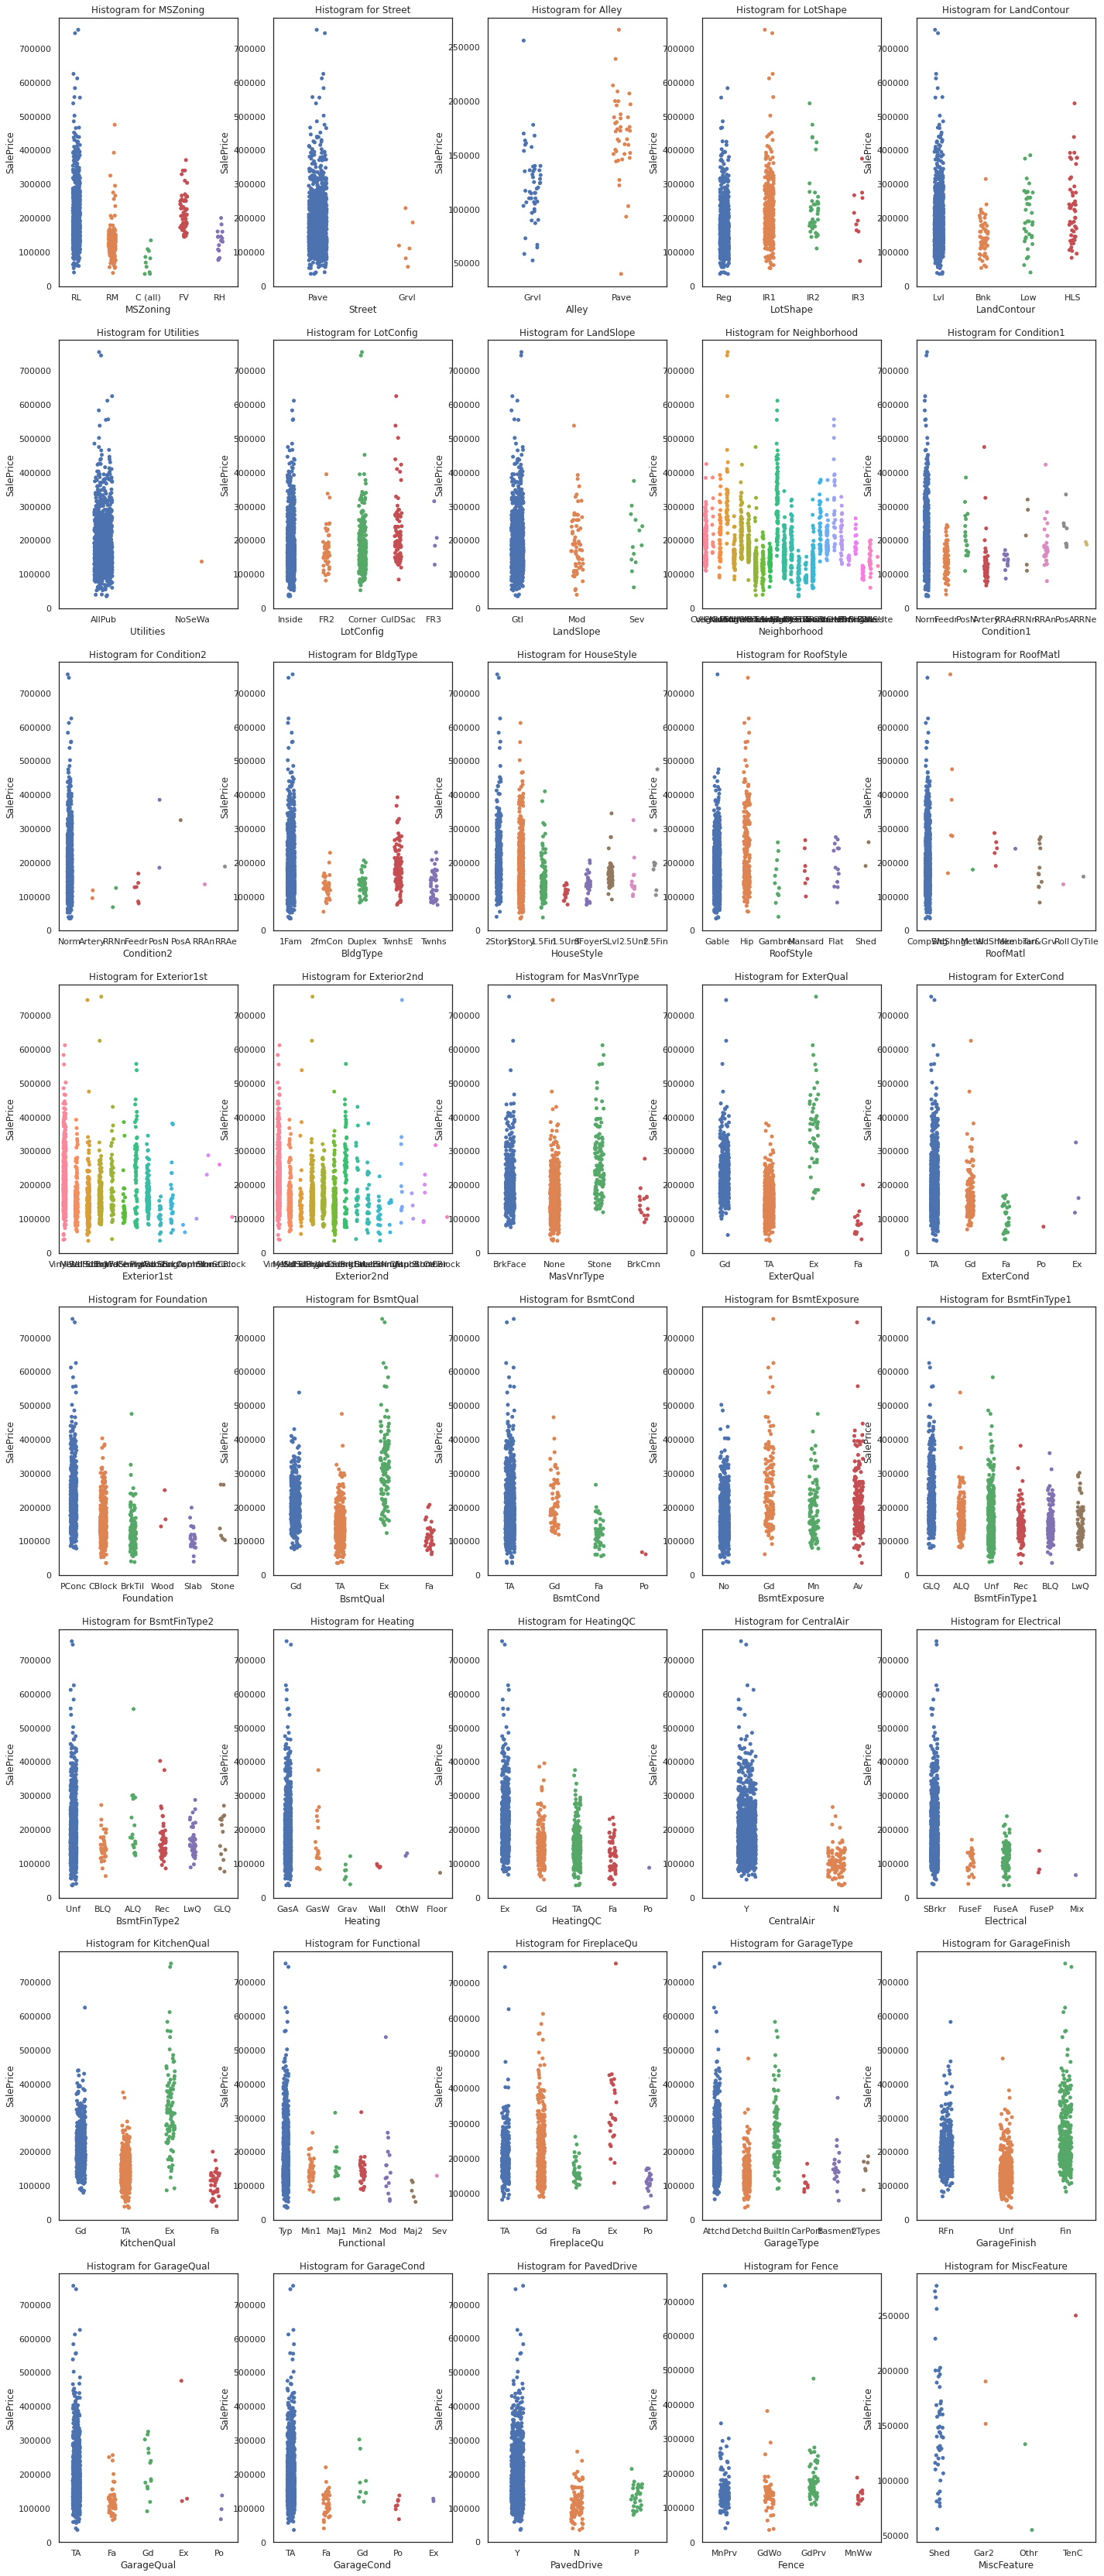

In [34]:
plt.figure(figsize=(24,60))
col_count = 1

for col in cat_features[:40]:
    plt.subplot(8,5,col_count)
    sns.stripplot(data=df_all, x=col, y=label)
    plt.title(f'Histogram for {col}')
    
    col_count += 1

## Feature Evaluation

* Numerical features:
    * The **BsmtFinSF2** feature tracks the rating of a basement area, if there is more than one area in the basement. It has more than 90% of its values as 0, which means it has little information and should be dropped
    * The **LowQualFinSF** has the amount of square feet that is finished in a low quality. It has more than 95% of its values as 0, which means it has little information and should be dropped
    * The **BsmtHalfBath** feature tracks the amount of half baths in the basement. It has more than 90% of its values as 0, which means it has little information and should be dropped
    * The **KitchenAbvGr** feature tracks the rating of kitchens, in the house, above average rating. It has more than 90% if its values as 1, which means it has little information and should be dropped
    * The **EnclosedPorch** feature tracks the area of any enclosed porch. It has more than 90% if its values as 0, which means it has little information and should be dropped
    * The **3SsnPorch** feature tracks the area of any three season porch. It has more than 90% if its values as 0, which means it has little information and should be dropped
    * The **MiscVal** should be dropped since we are planing to drop the **MiscFeature** feature

* Categorical features:
    * The **Street** feature has 6 values with 'Grvl' and the rest with 'Pave', this provides very little information in the dataset, so the feature should be dropped
    * The **Utilities** feature has a single values with 'NoSeWa' which provides close to no information to the whole dataset, so the feature should be dropped
    * The **Condition2** feature tracks any special conditions of the house, if there is more than one. There are only 15 values in the not normal category, so this feature provides little information and should be dropped
    * The **RoofMatl** feature has 1% ish values not in the CompShg category, so there is little information to be gained here and the feature should be dropped
    * The **Heating** feature has 1% ish values not in the GasA category, so there is little information to be gained here and the feature should be dropped
    * The **MiscFeature** feature has 3% ish values and the rest NaN's. Most of the values are in the 'Shed' category and most likely not crucial to the house price, so the feature should be dropped
    
The rest of the features has some information in them, at first glance. I will continue with these features. A correlation analysis and PCA analysis should give us further insight into their value. 

In [35]:
# drop features with little information
df_all = (df_all.drop(['BsmtFinSF2',
                       'LowQualFinSF',
                       'BsmtHalfBath',
                       'KitchenAbvGr',
                       'EnclosedPorch',
                       '3SsnPorch',
                       'MiscVal',
                       'Street', 
                       'Utilities', 
                       'Condition2', 
                       'RoofMatl', 
                       'Heating',
                       'MiscFeature'], 
                       axis=1))

In [36]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,NaN,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,NaN,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,NaN,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,0,NaN,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,NaN,12,2008,WD,Normal,250000.0,1


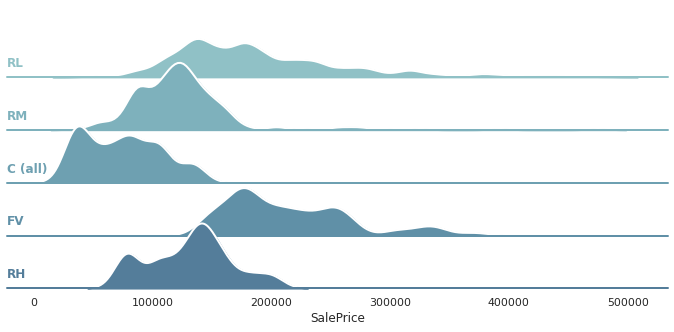

In [80]:
upper = np.where(df_all['SalePrice'] >= 500000)

df_all.drop(upper[0], inplace = True)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_all, row="MSZoning", hue="MSZoning", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "SalePrice",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "SalePrice", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "SalePrice")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Number of Fireplces


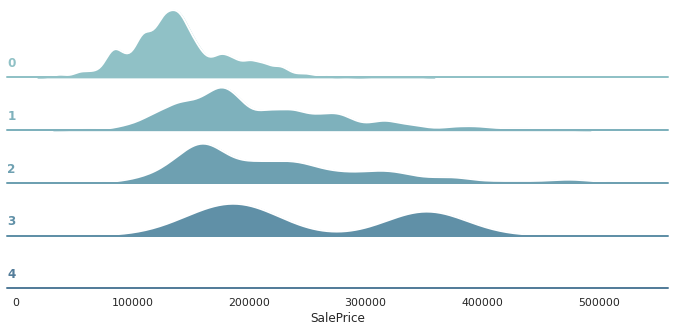

In [81]:
print('Number of Fireplces')

upper = np.where(df_all['SalePrice'] >= 500000)

df_all.drop(upper[0], inplace = True)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_all, row="Fireplaces", hue="Fireplaces", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "SalePrice",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "SalePrice", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "SalePrice")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)